# Homework 8

In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this, we will use the "Dogs & Cats" dataset that can be downloaded from Kaggle (https://www.kaggle.com/competitions/dogs-vs-cats/data?select=train.zip)

## Setup

In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

## Plot some examples

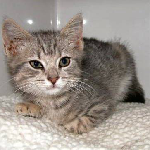

In [2]:
path = "../data/cats_dogs/train/"

img_nr = random.randint(1,10000)
load_img(os.path.join(path, f"cats/cat.{img_nr}.jpg"), target_size=(150,150,3))

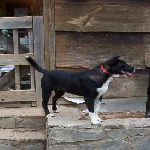

In [3]:
img_nr = random.randint(1,10000)
load_img(os.path.join(path, f"dogs/dog.{img_nr}.jpg"), target_size=(150,150,3))

## Load images and create datasets

In [4]:
img_size = 150
batch_size = 20

In [18]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory('../data/cats_dogs/train/',
                                         target_size=(img_size,img_size),
                                         batch_size=batch_size,
                                         shuffle=True,
                                         class_mode='binary')

val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory('../data/cats_dogs/validation/',
                                         target_size=(img_size,img_size),
                                         batch_size=batch_size,
                                         shuffle=True,
                                         class_mode='binary')

Found 20002 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [19]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [20]:
# look at one image and target
X, y = next(train_ds)
print(X.shape, y.shape)

(20, 150, 150, 3) (20,)


## Example Plots

In [21]:
def plotImages(images_arr, labels):
    i = 0
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("label =" + str(labels[i]))
        i+=1
    plt.tight_layout()
    plt.show()

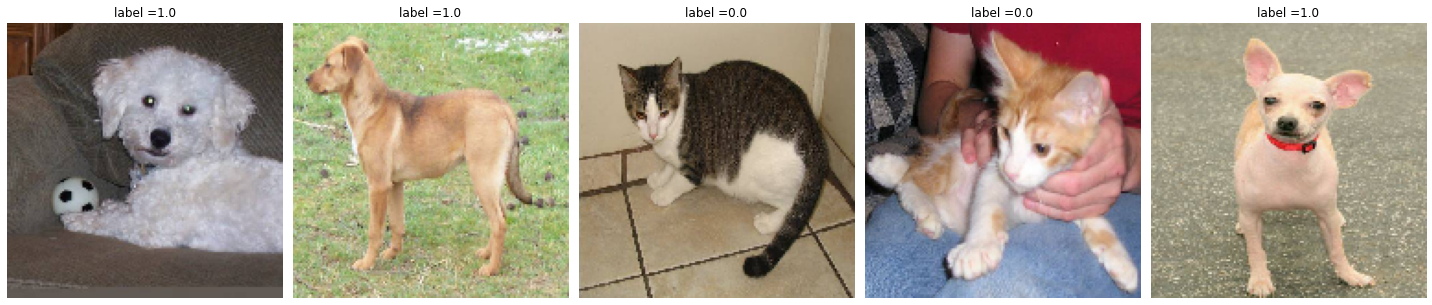

In [22]:
plotImages(X[:5], y[:5])

## Define the model

In [23]:
model = Sequential([
        Conv2D(32, 3, activation='relu', input_shape=(img_size, img_size, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
        ])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                11214912  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


In [25]:
# compile the model
lr=0.002 
momentum=0.8
optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss,
              metrics=['accuracy'])

In [26]:
# callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
checkpoint = keras.callbacks.ModelCheckpoint('cnn_{epoch:02d}_{val_accuracy:.3f}.h5',
                               save_best_only=True,
                               monitor='val_accuracy',
                               mode='max')

In [27]:
# fit the model
epochs=10

history = model.fit(train_ds,
         steps_per_epoch=100,
         epochs=epochs,
         validation_data=val_ds,
         validation_steps=50,
         callbacks=[early_stop, checkpoint])

Epoch 1/10
100/100 [==============================] - 21s 203ms/step - loss: 0.6938 - accuracy: 0.5326 - val_loss: 0.6902 - val_accuracy: 0.5340
Epoch 2/10
100/100 [==============================] - 25s 252ms/step - loss: 0.6872 - accuracy: 0.5292 - val_loss: 0.6700 - val_accuracy: 0.5810
Epoch 3/10
100/100 [==============================] - 26s 257ms/step - loss: 0.6699 - accuracy: 0.5877 - val_loss: 0.6591 - val_accuracy: 0.5990
Epoch 4/10
100/100 [==============================] - 24s 240ms/step - loss: 0.6593 - accuracy: 0.5923 - val_loss: 0.6574 - val_accuracy: 0.6070
Epoch 5/10
100/100 [==============================] - 25s 255ms/step - loss: 0.6470 - accuracy: 0.6183 - val_loss: 0.6559 - val_accuracy: 0.5950
Epoch 6/10
100/100 [==============================] - 24s 242ms/step - loss: 0.6487 - accuracy: 0.6251 - val_loss: 0.6402 - val_accuracy: 0.6450
Epoch 7/10
100/100 [==============================] - 25s 251ms/step - loss: 0.6423 - accuracy: 0.6354 - val_loss: 0.6853 - val_ac

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

Note: since we specify an activation for the output layer, we don't need to set ```from_logits=True```

**Answer:** We should use Binary Crossentropy

## Question 2
What's the total number of parameters of the model? You can use the ```summary``` method for that.

**Answer:** 11,215,873

## Generators and Training
For the next two questions, use the following data generator for both train and validation:

```ImageDataGenerator(rescale=1./255)``` 

We don't need to do any additional pre-processing for the images.

* When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem? (Answer: For binary classification, we should use ```class_mode='binary'``` 
* Use batch_size=20
* Use shuffle=True for both training and validaition

For training use ```.fit()``` with the following params:

```
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)
```

Note ```validation_steps=50``` - this parameter says "run only 50 steps on the validation data for evaluating the results". This way we iterate a bit faster, but don't use the entire validation dataset. That's why it's important to shuffle the validation dataset as well.

## Question 3
What is the median of training accuracy for this model?

In [30]:
history.history['accuracy']

[0.5350000262260437,
 0.5440000295639038,
 0.5864999890327454,
 0.5885000228881836,
 0.609499990940094,
 0.6175000071525574,
 0.6380000114440918,
 0.6284999847412109,
 0.6240000128746033,
 0.6570000052452087]

In [32]:
np.median(history.history['accuracy'])

0.6134999990463257

**Answer:** The median training accuracy is 0.6134999990463257

## Question 4

What is the standard deviation of training loss for this model?

In [33]:
history.history['loss']

[0.6886452436447144,
 0.6820681691169739,
 0.6657704710960388,
 0.6600415706634521,
 0.6511778235435486,
 0.6517398953437805,
 0.6376317143440247,
 0.6314077973365784,
 0.6323772072792053,
 0.6172577738761902]

In [34]:
np.std(history.history['loss'])

0.021735255767335517

**Answer:** The standard deviation of the training loss is 0.021735255767335517

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* ```rotation_range=40```,
* ```width_shift_range=0.2```,
* ```height_shift_range=0.2```,
* ```shear_range=0.2```,
* ```zoom_range=0.2```,
* ```horizontal_flip=True```,
* ```fill_mode='nearest'```

## Question 5
Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for the model trained with augmentations?

In [35]:
train_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')
train_ds = train_gen.flow_from_directory('../data/cats_dogs/train/',
                                         target_size=(img_size,img_size),
                                         batch_size=batch_size,
                                         shuffle=True,
                                         class_mode='binary')

val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory('../data/cats_dogs/validation/',
                                         target_size=(img_size,img_size),
                                         batch_size=batch_size,
                                         shuffle=True,
                                         class_mode='binary')

Found 20002 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [36]:
# fit the model
epochs=10

history = model.fit(train_ds,
         steps_per_epoch=100,
         epochs=epochs,
         validation_data=val_ds,
         validation_steps=50,
         callbacks=[early_stop, checkpoint])

Epoch 1/10
100/100 [==============================] - 35s 352ms/step - loss: 0.6621 - accuracy: 0.5885 - val_loss: 0.6266 - val_accuracy: 0.6390
Epoch 2/10
100/100 [==============================] - 38s 382ms/step - loss: 0.6540 - accuracy: 0.5995 - val_loss: 0.6257 - val_accuracy: 0.6560
Epoch 3/10
100/100 [==============================] - 37s 373ms/step - loss: 0.6486 - accuracy: 0.6115 - val_loss: 0.6297 - val_accuracy: 0.6370
Epoch 4/10
100/100 [==============================] - 37s 373ms/step - loss: 0.6550 - accuracy: 0.5925 - val_loss: 0.6222 - val_accuracy: 0.6660
Epoch 5/10
100/100 [==============================] - 36s 366ms/step - loss: 0.6483 - accuracy: 0.6100 - val_loss: 0.6141 - val_accuracy: 0.6480
Epoch 6/10
100/100 [==============================] - 38s 377ms/step - loss: 0.6480 - accuracy: 0.6045 - val_loss: 0.6249 - val_accuracy: 0.6590
Epoch 7/10
100/100 [==============================] - 37s 368ms/step - loss: 0.6499 - accuracy: 0.6105 - val_loss: 0.6357 - val_ac

In [37]:
history.history['val_accuracy']

[0.6389999985694885,
 0.656000018119812,
 0.6370000243186951,
 0.6660000085830688,
 0.6480000019073486,
 0.6589999794960022,
 0.6140000224113464,
 0.6100000143051147,
 0.6610000133514404,
 0.6370000243186951]

In [38]:
np.median(history.history['val_accuracy'])

0.6435000002384186

**Answer:** The median validation accuracy is 0.6435000002384186

## Question 6
What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [39]:
val_acc = history.history['val_accuracy'][6:]
val_acc

[0.6140000224113464,
 0.6100000143051147,
 0.6610000133514404,
 0.6370000243186951]

In [40]:
np.mean(val_acc)

0.6305000185966492

**Answer:** The mean validation accuracy of the last 5 epochs is 0.6435000002384186